# 1. loading the libraries

In [2]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, accuracy_score, classification_report, log_loss, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from math import sqrt

%matplotlib inline

In [3]:
# to change the scientific number to float
np.set_printoptions(formatter={'float_kind': '{:f}'.format})

# increase the size of the sns plots
sns.set(rc={'figure.figsize':(12, 10)})

## Loading the data

In [4]:
# loading csv file into a dataframe
loan_df = pd.read_csv('Loan_data.csv')

# printing the number of row and columns of the data set
print('\n number of rows and columns: ', loan_df.shape, '\n\n')

# printing the first 5 row of the data set
loan_df.head()


 number of rows and columns:  (1006, 14) 




,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Stauts,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan
0,No Data,critical,Learning / Edu purposes,2116.0,0-200,5-7 Years,Male,No,Property - Real Estate,47.0,House Owner,Services,No,No
1,No Data,critical,TV,2438.0,No Data,7+ Years,Male,No,Savings Account,52.0,House Owner,Skilled Labor,No,No
2,No Data,critical,Buying a New Car,2144.0,0-200,2-5 Years,Male,No,Vehicle,48.0,House Owner,Skilled Labor,No,No
3,No Data,critical,Home furniture,2073.0,No Data,2-5 Years,Married,No,Vehicle,25.0,House Owner,Skilled Labor,Yes,No
4,No Data,critical,Support for Business,1276.0,No Data,7+ Years,Male,No,No Security,59.0,Renting,Services,No,No


# 2. Data preprocession

## Exploratory data Analysis

In [5]:
# checking for null values

loan_df.isna().sum()

Type of Account          2
Account History          2
Reason for the Loan      3
Loan Amount              3
Account Savings          4
Employment History       5
Individual Stauts        5
Other Loans              5
Security / Collateral    5
Age                      4
Residence Status         4
Job                      4
Completed Other loan?    4
Good Loan                5
dtype: int64

In [6]:
# checking the null observations for a particular column

# check if there is any chance of keeping the NaN rows, any way we can fill the missing value, if we can fill then drop it

loan_df[loan_df['Employment History'].isna()]

,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Stauts,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan
686,Type C,Good,Buying a New Car,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
721,Type C,critical,Home furniture,5387.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
737,Type C,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,House Owner,Services,No,NaN
1005,NaN,NaN,NaN,1765.0,0-201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# deleting the null value

loan_df = loan_df.dropna(subset=['Employment History'])

# printing the shape after droping the na columns
loan_df.shape

(1001, 14)

In [8]:
# checking for null values after droping

print(loan_df.isna().sum())

Type of Account          0
Account History          0
Reason for the Loan      0
Loan Amount              0
Account Savings          0
Employment History       0
Individual Stauts        0
Other Loans              0
Security / Collateral    0
Age                      0
Residence Status         0
Job                      0
Completed Other loan?    0
Good Loan                0
dtype: int64


In [9]:
# check all the element within each feature

for cols in loan_df:
    unique_values = pd.unique(loan_df[cols])
    no_value = len(unique_values)
    if no_value < 10:
        print('The number of values for feature {} is {}: --- {}'.format(cols, no_value, unique_values))
    else:
        print('The number of values for feature {} is {}:'.format(cols, no_value, unique_values))

The number of values for feature Type of Account is 4: --- ['No Data' 'Type A' 'Type B' 'Type C']
The number of values for feature Account History is 3: --- ['critical' 'Average (known delays)' 'Good']
The number of values for feature Reason for the Loan is 10:
The number of values for feature Loan Amount is 911:
The number of values for feature Account Savings is 5: --- ['0-200' 'No Data' '200-500' '1000+' '500-1000']
The number of values for feature Employment History is 5: --- ['5-7 Years' '7+ Years' '2-5 Years' '0-2 Years' 'Unemployed']
The number of values for feature Individual Stauts is 5: --- ['Male' 'Married' 'Female' 'Divorced' 'Female_']
The number of values for feature Other Loans is 2: --- ['No' 'Yes']
The number of values for feature Security / Collateral is 4: --- ['Property - Real Estate' 'Savings Account' 'Vehicle' 'No Security']
The number of values for feature Age is 57:
The number of values for feature Residence Status is 3: --- ['House Owner' 'Renting' 'Free']
The 

## Visualizing the data

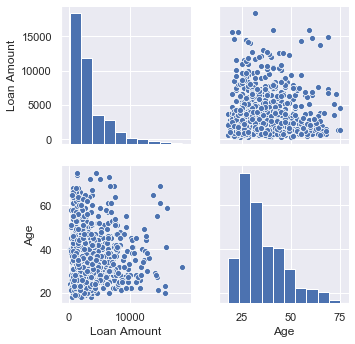

In [659]:
sns.pairplot(loan_df)

In the above plot we can see the outliers, that is loan amount is in minus and the age is aroun 300, which is not corrent

## Data Cleaning

In [ ]:
# deleting the outliers

display(loan_df[loan_df['Age'] > 100])

# storing all the age less then 100 to out data frame
loan_df = loan_df[loan_df['Age'] < 100]

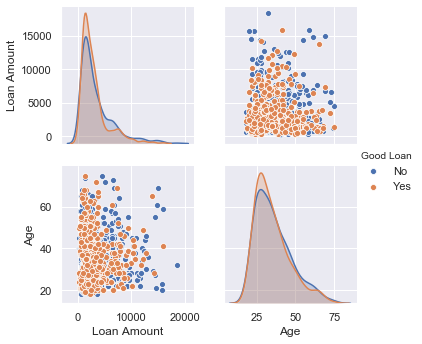

In [656]:
# ploting the graph after removing the outliers

sns.pairplot(loan_df, hue= 'Good Loan')

In [ ]:
sns.pairplot(loan_df, hue = 'Employment History')

No     536
Yes    464
Name: Good Loan, dtype: int64

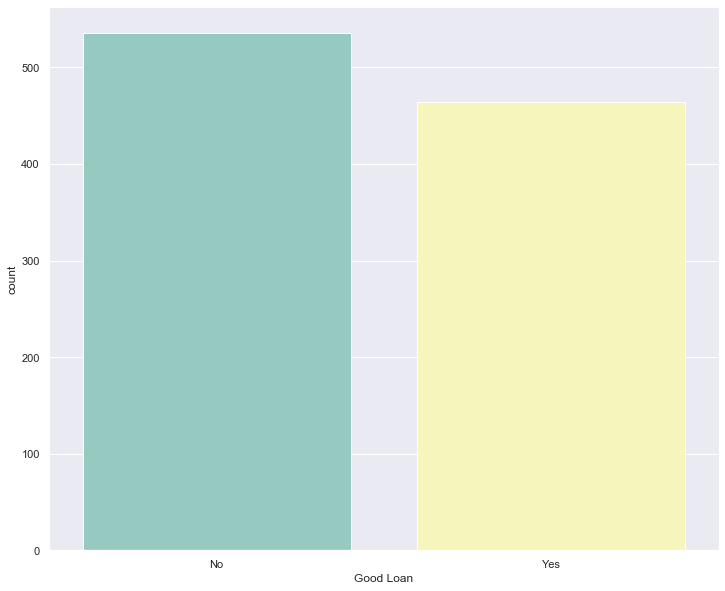

In [658]:
# check the distribution of y (dependent variable)

sns.countplot(x = 'Good Loan', data = loan_df, palette = 'Set3')

# count the number of good loan and bad loan
loan_df['Good Loan'].value_counts()

from the above plot we can see that we have a balanced datatset. so we have around 536 bad loan and 464 good loan

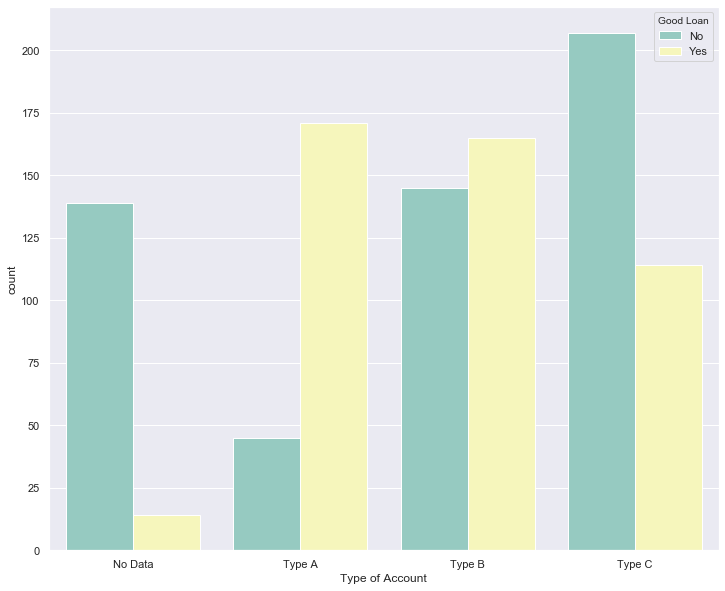

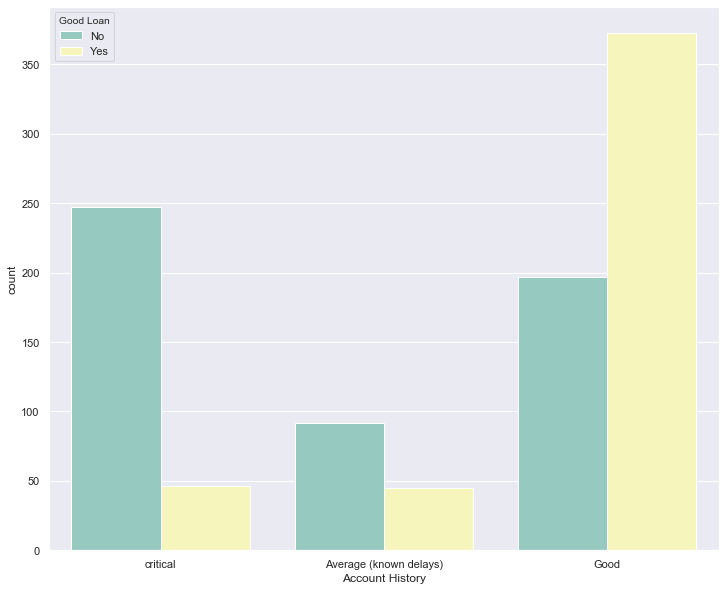

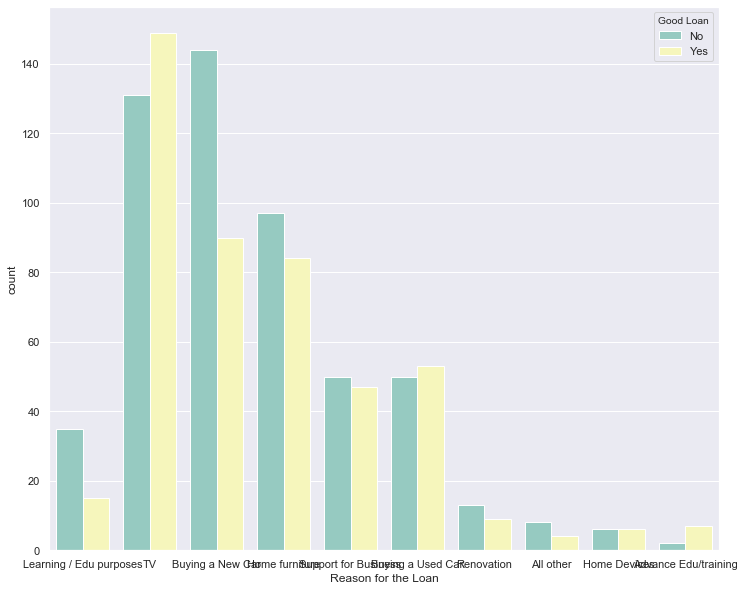

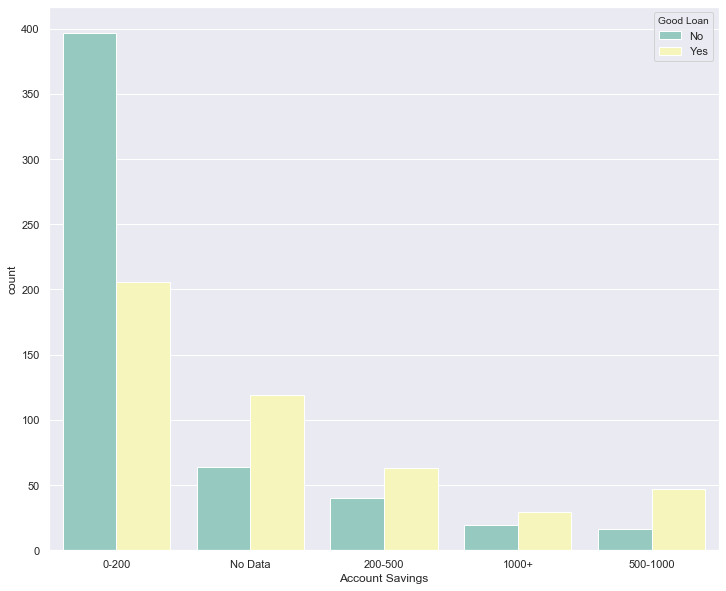

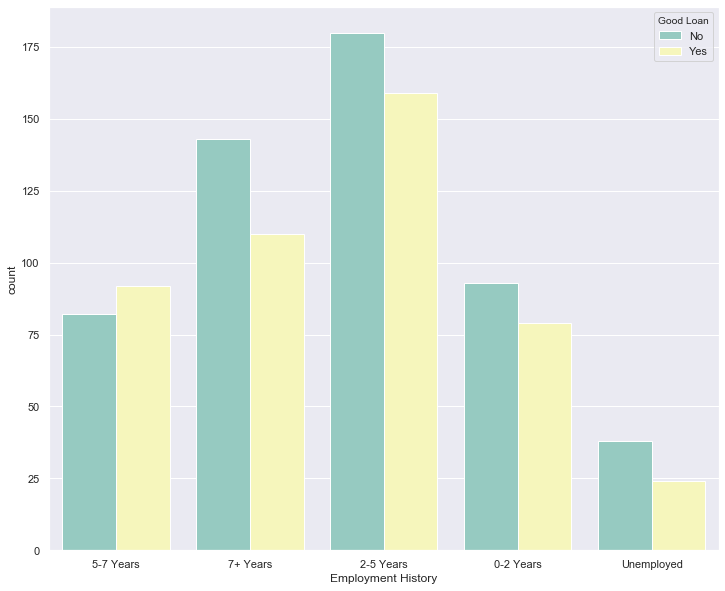

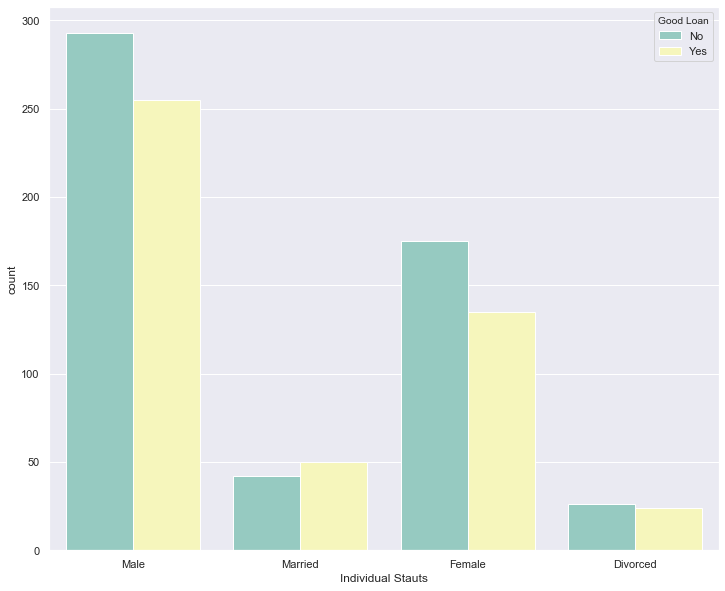

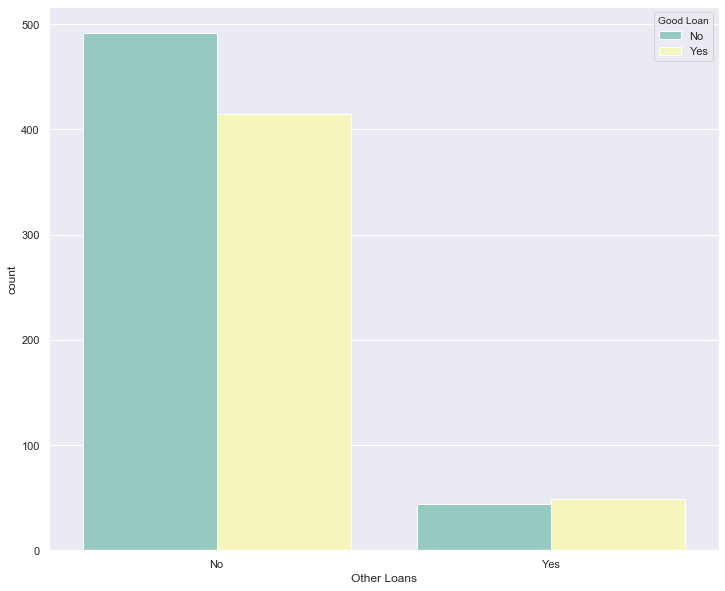

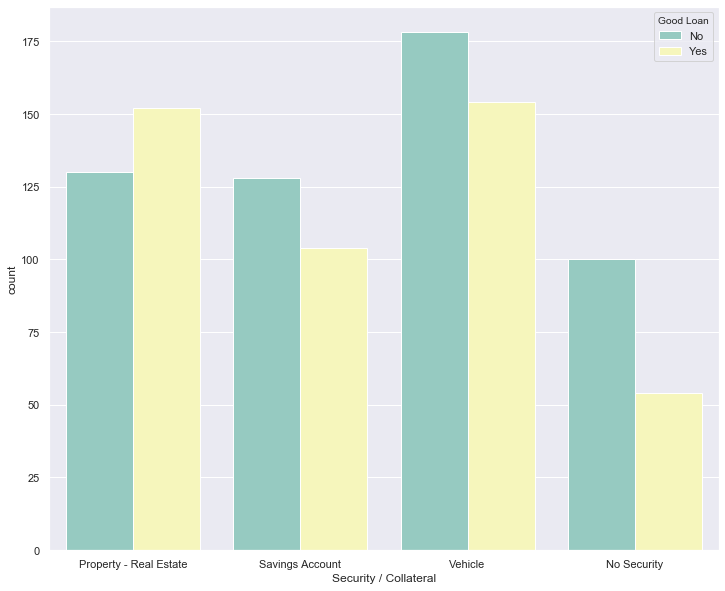

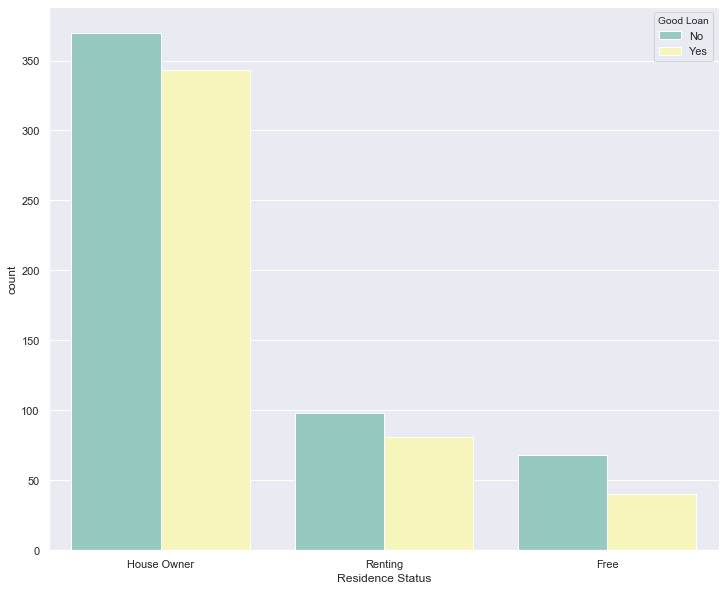

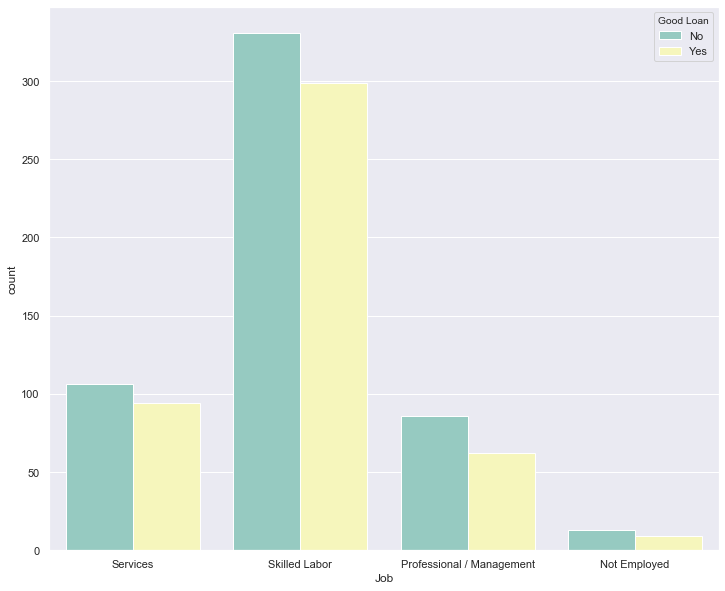

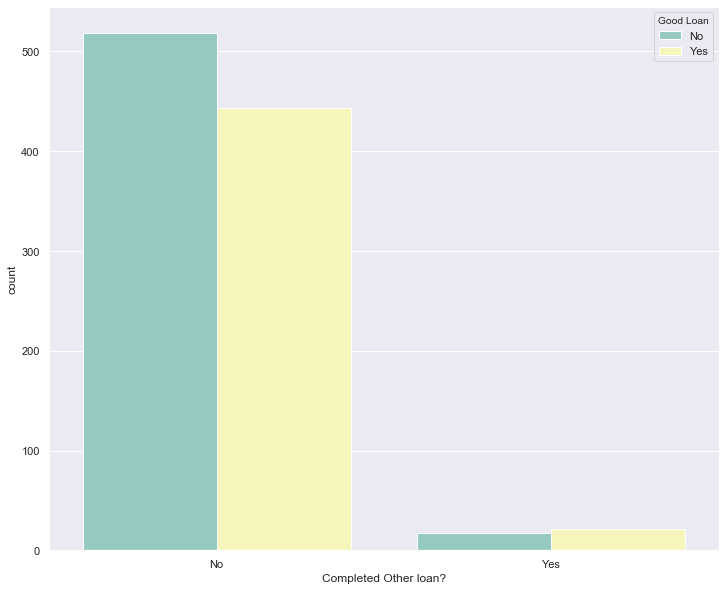

In [238]:
# looping throught all the feature by out Y variable - to see if there is any relationship

features = ['Type of Account', 'Account History', 'Reason for the Loan',
        'Account Savings', 'Employment History',
       'Individual Stauts', 'Other Loans', 'Security / Collateral',
       'Residence Status', 'Job', 'Completed Other loan?']

for feature in features:
    sns.countplot(x = feature, data = loan_df, palette = 'Set3' ,hue = 'Good Loan')
    plt.show()

## changing categorical value into numeric (Encoding)

In [290]:
# make categorical variable into numeric representation

new_loan_df = pd.get_dummies(data = loan_df, columns = features)

# Note: we can also do this will Encoding and oneHotEncoding from the preprocessing library

print('old dataframe shape {} \n' 'new dataframe shape {} \n'.format(loan_df.shape, new_loan_df.shape))

new_loan_df.head()

old dataframe shape (1000, 14) 
new dataframe shape (1000, 49) 



,Loan Amount,Age,Good Loan,Type of Account_No Data,Type of Account_Type A,Type of Account_Type B,Type of Account_Type C,Account History_Average (known delays),Account History_Good,Account History_critical,Reason for the Loan_Advance Edu/training,Reason for the Loan_All other,...,Security / Collateral_Property - Real Estate,Security / Collateral_Savings Account,Security / Collateral_Vehicle,Residence Status_Free,Residence Status_House Owner,Residence Status_Renting,Job_Not Employed,Job_Professional / Management,Job_Services,Job_Skilled Labor,Completed Other loan?_No,Completed Other loan?_Yes
0,2116.0,47.0,No,1,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0,1,0
1,2438.0,52.0,No,1,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1,1,0
2,2144.0,48.0,No,1,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1,1,0
3,2073.0,25.0,No,1,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1,0,1
4,1276.0,59.0,No,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0,1,0


In [295]:
# changing dependent variable into 0 or 1

new_loan_df['Good Loan'][new_loan_df['Good Loan'] == 'Yes'] = 1
new_loan_df['Good Loan'][new_loan_df['Good Loan'] == 'No'] = 0

new_loan_df.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Loan Amount,Age,Good Loan,Type of Account_No Data,Type of Account_Type A,Type of Account_Type B,Type of Account_Type C,Account History_Average (known delays),Account History_Good,Account History_critical,Reason for the Loan_Advance Edu/training,Reason for the Loan_All other,...,Security / Collateral_Property - Real Estate,Security / Collateral_Savings Account,Security / Collateral_Vehicle,Residence Status_Free,Residence Status_House Owner,Residence Status_Renting,Job_Not Employed,Job_Professional / Management,Job_Services,Job_Skilled Labor,Completed Other loan?_No,Completed Other loan?_Yes
0,2116.0,47.0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0,1,0
1,2438.0,52.0,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1,1,0
2,2144.0,48.0,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1,1,0
3,2073.0,25.0,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1,0,1
4,1276.0,59.0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0,1,0


**Note: We dont have to normalize/standardize in logistic regression due to logisic function 0 and 1.**

## Feature selection

In this example, we do not have many variables so we might use all of the data but in some cases, you have thousands of variables and you will need to filter them in order to save computational time

**Steps of Running Feature Importance**
- Split the data into X & y
- Run a Tree-based estimators (i.e. decision trees & random forests)
- Run Feature Importance

In [390]:
# spliting data into x and y

x = new_loan_df.drop('Good Loan', axis=1).values
y = new_loan_df[['Good Loan']]

# chaning the y to type int
y = y.astype(int)

In [328]:
# Run a Tree-based estimators (i.e. decision trees & random forests
dt = DecisionTreeClassifier(random_state=15, criterion='entropy', max_depth=10)
dt.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=15, splitter='best')

If you want to learn how Decesion Trees work, read here: https://www.datacamp.com/community/tutorials/decision-tree-classification-python

Official Doc: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

**Notes:**
- The importance of a feature is calculated as the (normalized) total reduction of entropy (other criterions too) brought by that feature or the higher information gain
- To understand the maths, read this: https://towardsdatascience.com/the-mathematics-of-decision-trees-random-forest-and-feature-importance-in-scikit-learn-and-spark-f2861df67e3

In [419]:
# Running feature importance

fi_col = []
fi = []

for i, column in enumerate(new_loan_df.drop('Good Loan', axis=1)):
    print('The feature importance for {} is {}: '.format(column, dt.feature_importances_[i]))
    
    fi.append(column)
    fi_col.append(dt.feature_importances_[i])

The feature importance for Loan Amount is 0.12122079844891431: 
The feature importance for Age is 0.07962988068108864: 
The feature importance for Type of Account_No Data is 0.054236275712355064: 
The feature importance for Type of Account_Type A is 0.04973253970745607: 
The feature importance for Type of Account_Type B is 0.0: 
The feature importance for Type of Account_Type C is 0.026698167265803152: 
The feature importance for Account History_Average (known delays) is 0.0026219295620499047: 
The feature importance for Account History_Good is 0.19131616315491018: 
The feature importance for Account History_critical is 0.0: 
The feature importance for Reason for the Loan_Advance Edu/training is 0.0: 
The feature importance for Reason for the Loan_All other is 0.0: 
The feature importance for Reason for the Loan_Buying a New Car is 0.012188194319512301: 
The feature importance for Reason for the Loan_Buying a Used Car is 0.00657340597791024: 
The feature importance for Reason for the L

In [375]:
# creating a dataframe for feature importance

fi_df = zip(fi, fi_col)
fi_df = pd.DataFrame(fi_df, columns = ['Feature', 'Feature Importance'])

# displaying by descending order
fi_df = fi_df.sort_values('Feature Importance', ascending = False).reset_index()

# Creating columns to keep
columns_to_keep = fi_df['Feature'][0:40]

# we will be using only the below listed column as out indpendent variable, becuase these column have some corellation with dependent variable
columns_to_keep 

0                            Account Savings_0-200
1                             Account History_Good
2                                      Loan Amount
3                                              Age
4                          Type of Account_No Data
5                           Type of Account_Type A
6                           Type of Account_Type C
7                                Job_Skilled Labor
8                                  Other Loans_Yes
9                          Account Savings_No Data
10        Reason for the Loan_Support for Business
11                          Reason for the Loan_TV
12                           Account Savings_1000+
13    Security / Collateral_Property - Real Estate
14            Reason for the Loan_Buying a New Car
15                                    Job_Services
16                    Residence Status_House Owner
17                    Employment History_0-2 Years
18              Reason for the Loan_Home furniture
19                         Acco


**Notes:**
- Please note that we have not normalised / scale our data
- Please note that we have not done any feature engineering - created new features
- Please note that we have not joined multiple datasets together
- Please note that we have not aggregated any of our data

# 3. Spliting the data - (Hold-out validation technique)

In [378]:
# printing the shape

print('data before feature selection: ', new_loan_df.shape)
print('data after feature selection: ', new_loan_df[columns_to_keep].shape)


data before feature selection:  (1000, 49)
data after feature selection:  (1000, 40)


In [599]:
# spliting the data into x and y

# 'values' will convert dataframe into numpy arrays

x = new_loan_df[columns_to_keep].values
y = new_loan_df['Good Loan']

# covertng datatype of y to int
y = y.astype(int)

print(x.shape)
print(y.shape)

(1000, 40)
(1000,)


In [600]:
# Hold-out validation

# Official Doc: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

# first set
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size=0.2, random_state = 15)

# second set
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train,train_size = 0.9, test_size=0.1, random_state = 15)

print(x_train.shape)
print(x_test.shape)
print(x_valid.shape)

print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)

(720, 40)
(200, 40)
(80, 40)
(720,)
(200,)
(80,)


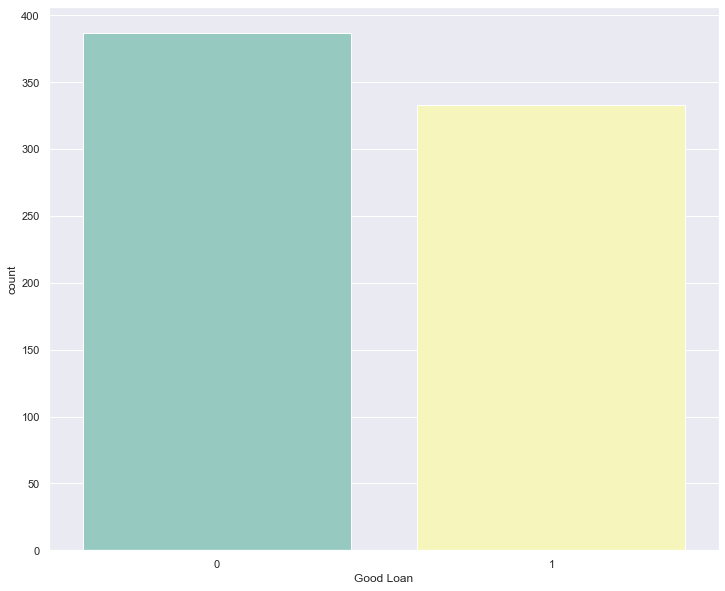

In [414]:
# checking the distribution of y (dependent variable)

ax = sns.countplot(x = y_train, palette = 'Set3')

# 4. Running Logistic Regression

In [424]:
# creating instance of logistic regression
logistic_regression = LogisticRegression(solver='lbfgs')

# training the model
logistic_regression.fit(x_train, y_train)

# logistic regression official documentation https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [495]:
# Differenet method we can use in logistic regression

# predict - Predict class labels for samples in X
y_predict = logistic_regression.predict(x_test)

# predicted_proba in testing data
pred_prob_train = logistic_regression.predict_proba(x_train)

# predict_proba - Probability estimates
prediction_prob = logistic_regression.predict_proba(x_test)

# coef_ - Coefficient of the features in the decision function
logistic_regression.coef_

array([[-1.414415, 1.895515, -0.000124, 0.006603, -1.451759, 0.971756,
        -0.191489, -0.089067, 0.258480, 0.529939, 0.161084, 0.050142,
        0.239664, 0.442354, -0.690158, -0.117224, 0.041737, -0.451682,
        0.313925, 0.169194, -0.379968, 0.034117, -0.170529, 0.508263,
        -0.135459, 0.013961, 0.392004, 0.047327, -0.036950, 0.365566,
        0.127444, -0.242493, 0.132442, -0.278851, 0.101799, -0.066592,
        -0.001908, -0.259929, 0.112389, -0.114838]])

# 5. Evaluating the Model

In [468]:
# score- Returns the mean accuracy on the given test data and labels - below

# Accuracy on Train
print('The accuracy on training dataset:', logistic_regression.score(x_train ,y_train))

# Accuracy on testing
print('\nThe accuracy on testing dataset:', logistic_regression.score(x_test ,y_test))

# classificaion report
print('\n\n',classification_report(y_test, y_predict))

The accuracy on training dataset: 0.7791666666666667

The accuracy on testing dataset: 0.75


               precision    recall  f1-score   support

           0       0.77      0.75      0.76       106
           1       0.73      0.74      0.74        94

    accuracy                           0.75       200
   macro avg       0.75      0.75      0.75       200
weighted avg       0.75      0.75      0.75       200



In [476]:
# confusion matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [474]:
# printing confision matrix
cm = confusion_matrix(y_test, y_predict)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
cm_norm

array([[0.754717, 0.245283],
       [0.255319, 0.744681]])

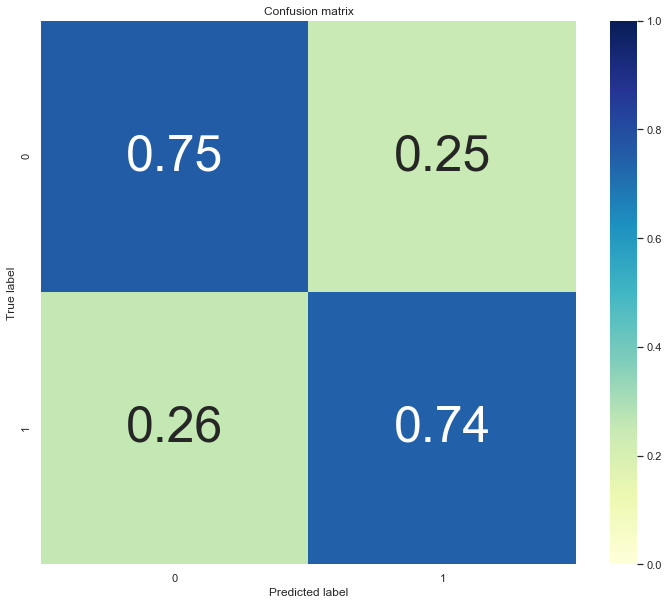

In [477]:
plot_confusion_matrix(cm_norm, logistic_regression.classes_)

In [482]:
# get the sum 
cm.sum(axis=0)

array([104,  96])

In [485]:
# get the diagonal numbers
np.diag(cm)

array([80, 70])

In [491]:
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)
FP = cm.sum(axis = 0) - np.diag(cm)
FN = cm.sum(axis = 1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP) 


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP / (TP + FN)
print("The True Positive Rate is:", TPR)

# Precision or positive predictive value
PPV = TP / (TP + FP)
print("The Precision is:", PPV)

# False positive rate or False alarm rate
FPR = FP / (FP + TN)
print("The False positive rate is:", FPR)


# False negative rate or Miss Rate
FNR = FN / (FN + TP)
print("The False Negative Rate is: ", FNR)


##Total averages :
print("")
print("The average TPR is:", TPR.sum()/2)
print("The average Precision is:", PPV.sum()/2)
print("The average False positive rate is:", FPR.sum()/2)
print("The average False Negative Rate is:", FNR.sum()/2)

The True Positive Rate is: [0.754717 0.744681]
The Precision is: [0.769231 0.729167]
The False positive rate is: [0.255319 0.245283]
The False Negative Rate is:  [0.245283 0.255319]

The average TPR is: 0.7496989160979526
The average Precision is: 0.749198717948718
The average False positive rate is: 0.25030108390204736
The average False Negative Rate is: 0.25030108390204736


## Logarithmic Loss, or Log Loss or cross Entropy loss
- Log loss is an error matrix
- This is the loss function used in (multinomial) logistic regression and extensions of it such as neural networks, defined as the negative log-likelihood of the true labels given a probabilistic classifier’s predictions.
- Why it's important? For example, imagine having 2 models / classifiers that both predict one observation correctly (Good Loan). However, 1 classifier has a predicted probability of 0.54 and the other 0.95. Which one will you choose? Classification Accuracy will not help here as it will get both on 100%

In [503]:
# Running log loss on training
print('The log loss on Training dataset is: ', log_loss(y_train, pred_prob_train))

# Running log loss on testing
print('The log loss on Training dataset is: ', log_loss(y_test, prediction_prob))

The log loss on Training dataset is:  0.4561218471634689
The log loss on Training dataset is:  0.4935875358646334


# 6. Hyper Parameter Tuning
- We will loop over parameter C (Inverse of regularization strength).
- Inverse of regularization strength helps to avoid overfitting - it penalizes large values of your parameters
- It also helps to find Global Minimum by moving to better "solutions" from local minimum to global minimum
- The values of C to search should be n-equally-spaced values in log space ranging from 1e-5 to 1e5

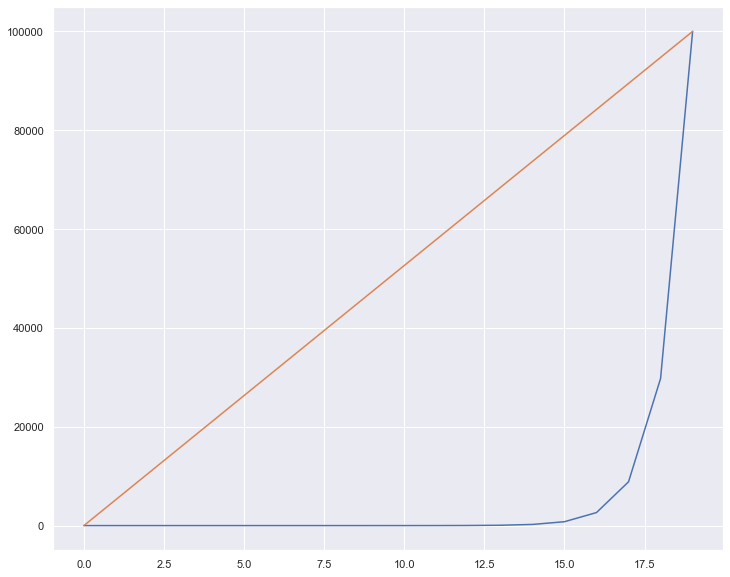

In [10]:
# Creating a range for C values
np.geomspace(1e-5, 1e5, num=20)

# ploting it
plt.plot(np.geomspace(1e-5, 1e5, num=20)) #  uniformly distributed in log space
plt.plot(np.linspace(1e-5, 1e5, num=20)) # uniformly distributed in linear space, instead of log space

# plt.plot(np.logspace(np.log10(1e-5) , np.log10(1e5) , num=20)) # same as geomspace

In [530]:
# looping over the parameter
c_list = np.geomspace(1e-5, 1e5, num=20)
# classification accuracy
CA = []
logarithmic_loss = []

for c in c_list:
    logistic_regression2 = LogisticRegression(random_state = 15, solver = 'lbfgs', C = c)
    logistic_regression2.fit(x_train, y_train)
    score = logistic_regression2.score(x_test, y_test)
    CA.append(score)
    print('\nThe classification accuracy of C parameter {} is: {}'.format(c, score))
    prediction_prob_t = logistic_regression2.predict_proba(x_test)
    log_loss2 = log_loss(y_test, prediction_prob_t)
    logarithmic_loss.append(log_loss2)
    print('The Logarithmic loss of C parameter {} is: {}'.format(c, log_loss2))


The classification accuracy of C parameter 1e-05 is: 0.535
The Logarithmic loss of C parameter 1e-05 is: 0.6962402407698133

The classification accuracy of C parameter 3.359818286283781e-05 is: 0.54
The Logarithmic loss of C parameter 3.359818286283781e-05 is: 0.6942639549968331

The classification accuracy of C parameter 0.00011288378916846884 is: 0.54
The Logarithmic loss of C parameter 0.00011288378916846884 is: 0.6927526308140247

The classification accuracy of C parameter 0.000379269019073225 is: 0.545
The Logarithmic loss of C parameter 0.000379269019073225 is: 0.6875079443809543

The classification accuracy of C parameter 0.0012742749857031334 is: 0.64
The Logarithmic loss of C parameter 0.0012742749857031334 is: 0.6714766139156118

The classification accuracy of C parameter 0.004281332398719391 is: 0.67
The Logarithmic loss of C parameter 0.004281332398719391 is: 0.6329923109453734

The classification accuracy of C parameter 0.01438449888287663 is: 0.725
The Logarithmic loss o

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)



The classification accuracy of C parameter 69.51927961775606 is: 0.77
The Logarithmic loss of C parameter 69.51927961775606 is: 0.49317739608922906

The classification accuracy of C parameter 233.57214690901213 is: 0.755
The Logarithmic loss of C parameter 233.57214690901213 is: 0.49414558401089387

The classification accuracy of C parameter 784.7599703514607 is: 0.775
The Logarithmic loss of C parameter 784.7599703514607 is: 0.487472355786839

The classification accuracy of C parameter 2636.6508987303555 is: 0.77
The Logarithmic loss of C parameter 2636.6508987303555 is: 0.493192467520479


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)



The classification accuracy of C parameter 8858.667904100832 is: 0.77
The Logarithmic loss of C parameter 8858.667904100832 is: 0.4932270822908674

The classification accuracy of C parameter 29763.51441631313 is: 0.77
The Logarithmic loss of C parameter 29763.51441631313 is: 0.49320162808172013

The classification accuracy of C parameter 100000.0 is: 0.76
The Logarithmic loss of C parameter 100000.0 is: 0.49176627323953603


In [566]:
# putting the outcome in a dataframe

# reshaping
CA2 = np.array(CA).reshape(20)
logarithmic_loss2 = np.array(logarithmic_loss).reshape(20)

# zip
outcome = zip(c_list, CA2, logarithmic_loss2)

# dataframe
outcome_df = pd.DataFrame(outcome, columns = ['C list', 'CA2', 'Logarithmic Loss'])

# sorting the dataset
outcome_df.sort_values('Logarithmic Loss', ascending = True).reset_index()

,index,C list,CA2,Logarithmic Loss
0,15,784.759970,0.775,0.487472
1,19,100000.000000,0.760,0.491766
2,13,69.519280,0.770,0.493177
3,16,2636.650899,0.770,0.493192
4,18,29763.514416,0.770,0.493202
5,17,8858.667904,0.770,0.493227
6,9,0.545559,0.745,0.493521
7,10,1.832981,0.750,0.493551
8,12,20.691381,0.770,0.493771
9,14,233.572147,0.755,0.494146


In [617]:
# Another way identifying the best C parameter
# Scikit-learn offers a LogisticRegressionCV module which implements Logistic Regression 
# with builtin cross-validation to find out the optimal C parameter

from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold
kf = KFold(n_splits=3, random_state=0, shuffle=True)

# Logistic regression CV
logistic_regression_3 = LogisticRegressionCV(random_state=15, Cs = c_list, solver ='lbfgs')
logistic_regression_3.fit(x_train, y_train)

print('The CA score is:', logistic_regression_3.score(x_test, y_test))

pred_proba_t = logistic_regression_3.predict_proba(x_test)
log_loss3 = log_loss(y_test, pred_proba_t)
print("The Logistic Loss is: ", log_loss3)

print("The optimal C parameter is: ", logistic_regression_3.C_)

# Doc: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


The CA score is: 0.77
The Logistic Loss is:  0.49225011724365453
The optimal C parameter is:  [0.545559]


**K-fold cross validation:**
Advantage: K-fold cross validation uses all the training data to train the model, by applying k different splits; repeated train-test splits converge to the true accuracy given that the training data is representable for the underlying distribution; however in practise this is often overoptimistic. Disadvantage: The disadvantage of this method is that the training algorithm has to be rerun from the beginning k times, which means it takes k times as much computation to get an evaluation. Additionally, if you want to test the performance on a completely new dataset that the algorithm has never seen, you cannot do this with k-fold cross validation.

**Hold-out:**
Advantage: The advantage of Hold-out is that you can test how your model performs on completely unseen data that you haven't used when training the model. Additionally, Hold-out is usually much faster and less computationally expensive. Disadvantage: The evaluation may depend heavily on which data points end up in the training set and which end up in the test set, and thus the evaluation may be significantly different depending on how the division is made.


The classification accuracy of C parameter 1e-05 is: 0.535
The Logarithmic loss of C parameter 1e-05 is: 0.6962402407698133


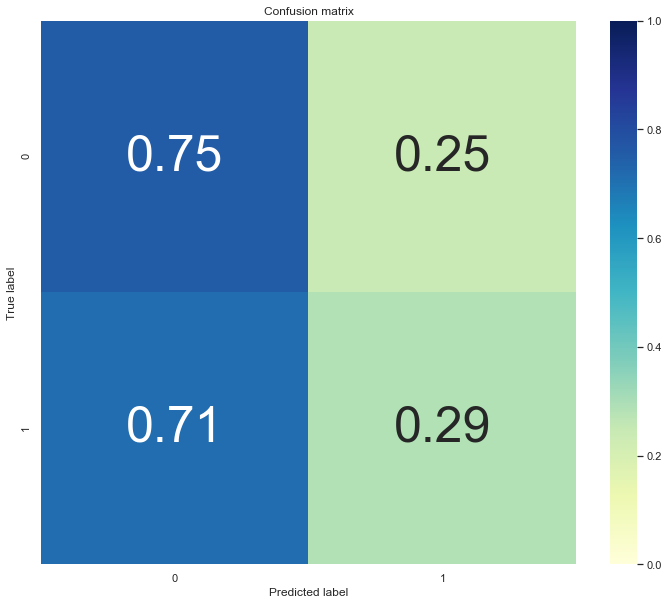


The classification accuracy of C parameter 3.359818286283781e-05 is: 0.54
The Logarithmic loss of C parameter 3.359818286283781e-05 is: 0.6942639549968331


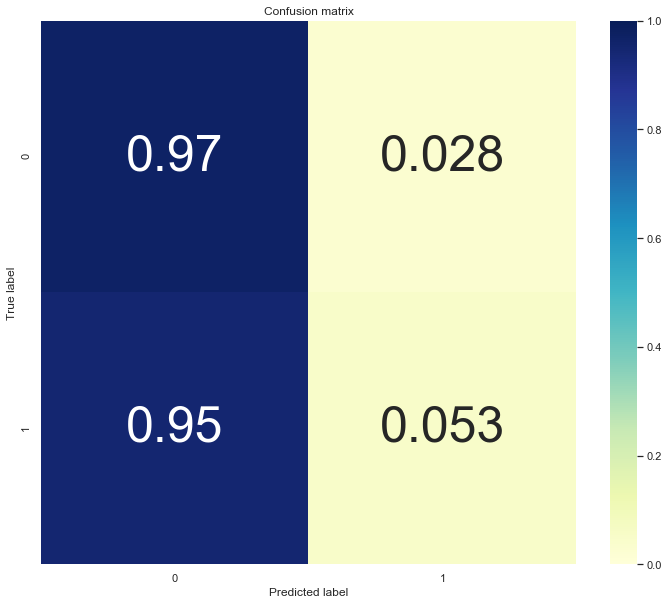


The classification accuracy of C parameter 0.00011288378916846884 is: 0.54
The Logarithmic loss of C parameter 0.00011288378916846884 is: 0.6927526308140247


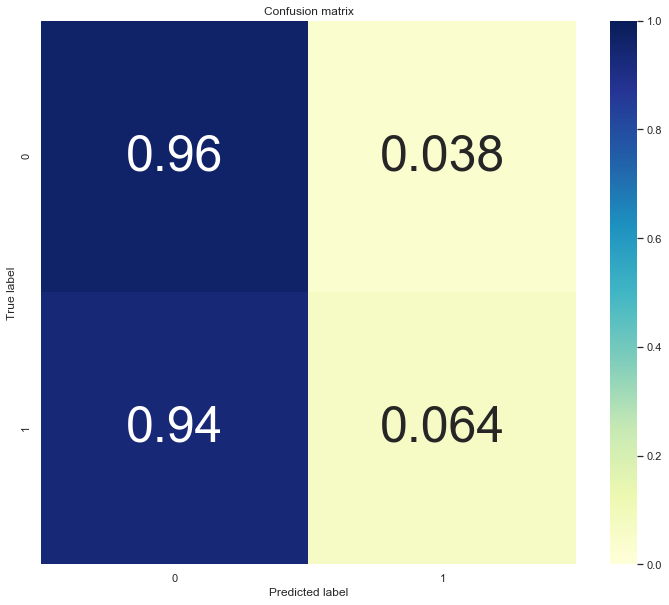


The classification accuracy of C parameter 0.000379269019073225 is: 0.545
The Logarithmic loss of C parameter 0.000379269019073225 is: 0.6875079443809543


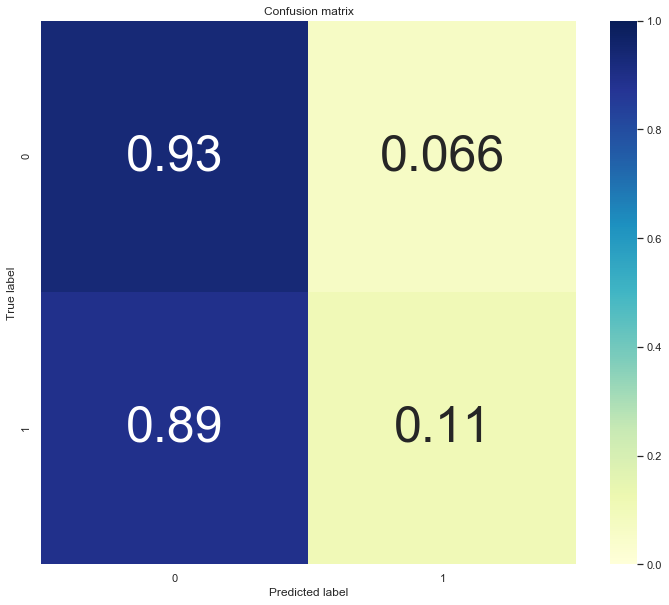


The classification accuracy of C parameter 0.0012742749857031334 is: 0.64
The Logarithmic loss of C parameter 0.0012742749857031334 is: 0.6714766139156118


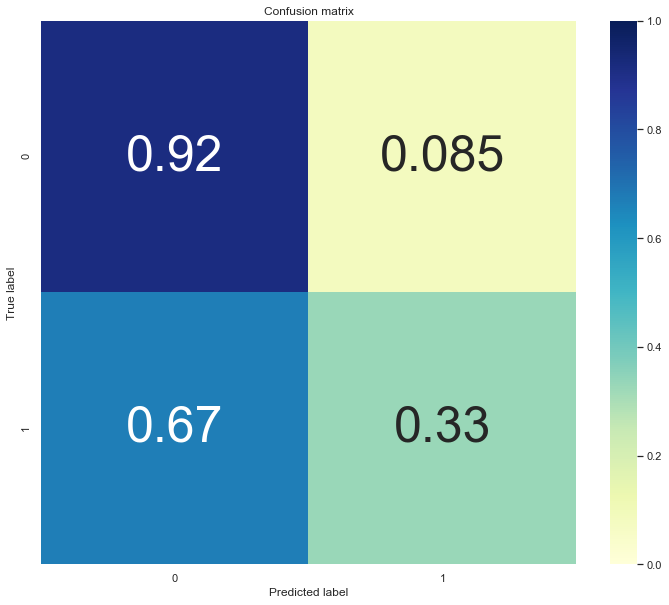


The classification accuracy of C parameter 0.004281332398719391 is: 0.67
The Logarithmic loss of C parameter 0.004281332398719391 is: 0.6329923109453734


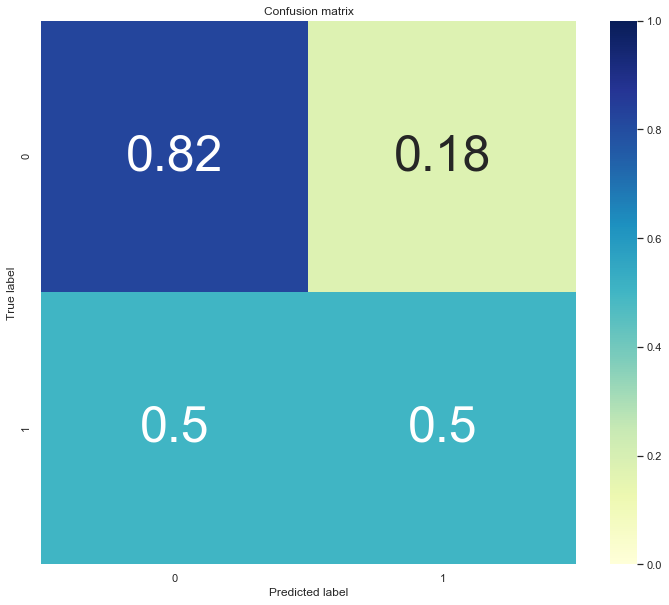


The classification accuracy of C parameter 0.01438449888287663 is: 0.725
The Logarithmic loss of C parameter 0.01438449888287663 is: 0.5733419963609485


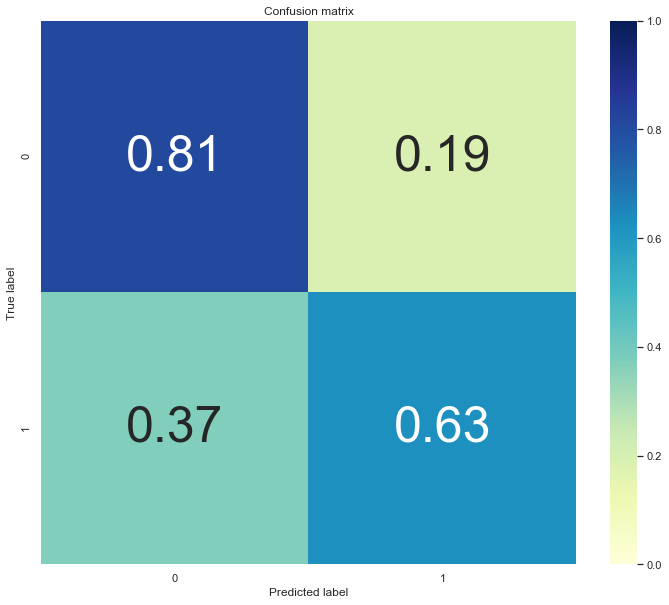


The classification accuracy of C parameter 0.04832930238571752 is: 0.705
The Logarithmic loss of C parameter 0.04832930238571752 is: 0.522321773341015


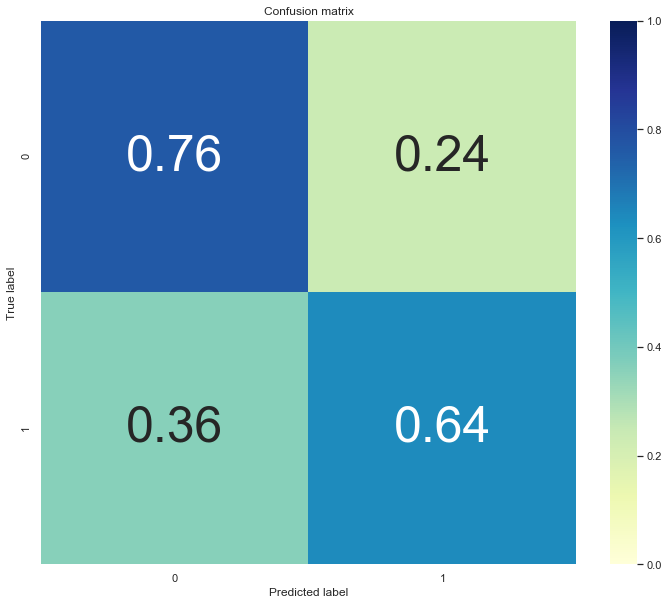


The classification accuracy of C parameter 0.1623776739188721 is: 0.745
The Logarithmic loss of C parameter 0.1623776739188721 is: 0.4987156122747405


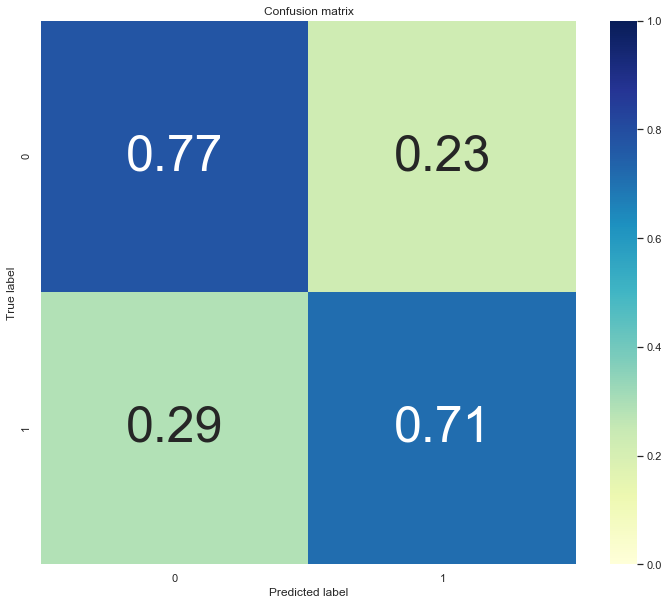


The classification accuracy of C parameter 0.5455594781168515 is: 0.745
The Logarithmic loss of C parameter 0.5455594781168515 is: 0.4935207010746127


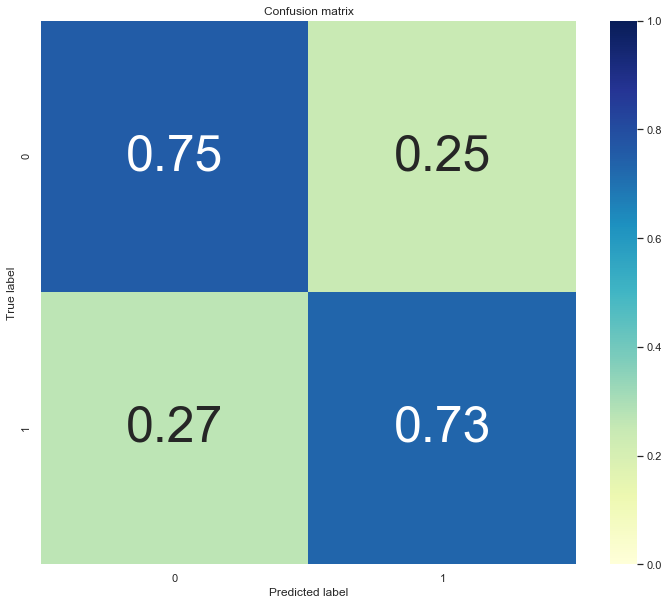


The classification accuracy of C parameter 1.8329807108324339 is: 0.75
The Logarithmic loss of C parameter 1.8329807108324339 is: 0.4935509170715872


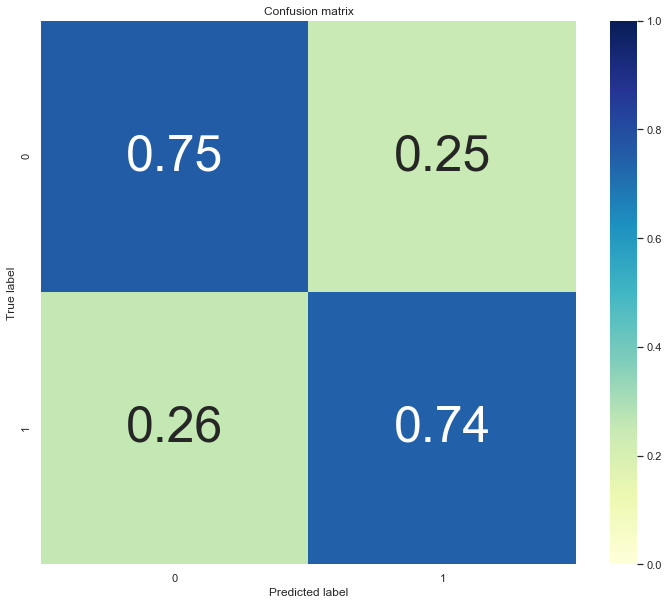

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)



The classification accuracy of C parameter 6.1584821106602545 is: 0.76
The Logarithmic loss of C parameter 6.1584821106602545 is: 0.49476289651320926


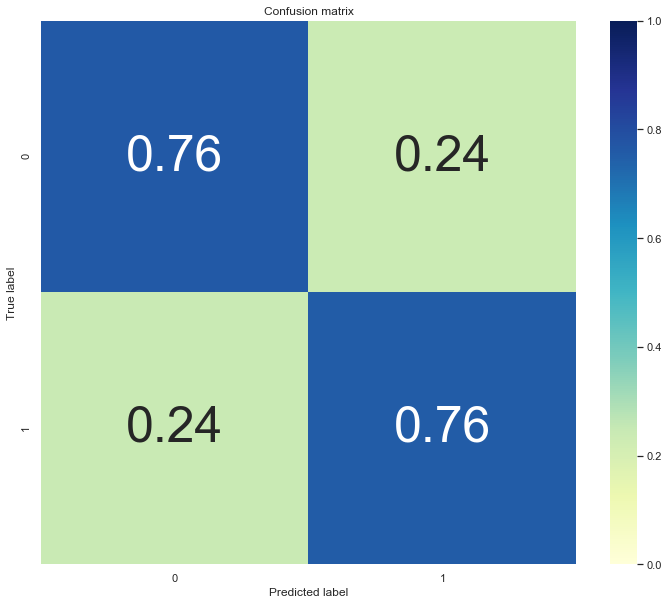

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)



The classification accuracy of C parameter 20.6913808111479 is: 0.77
The Logarithmic loss of C parameter 20.6913808111479 is: 0.4937706418455813


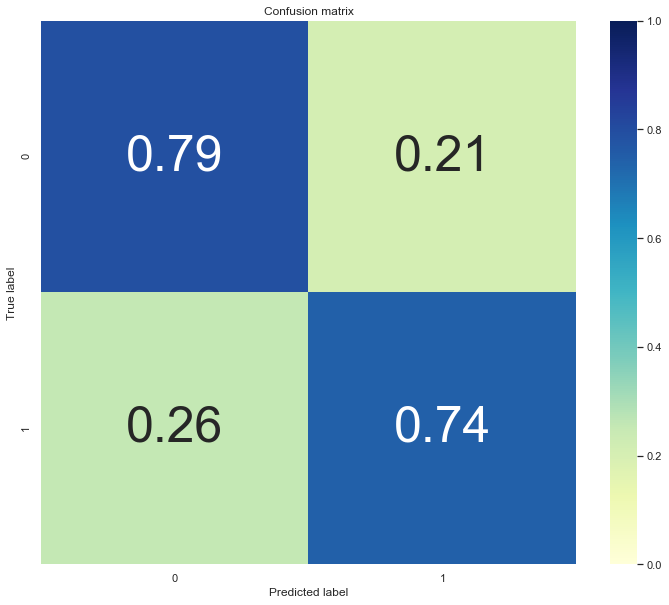

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)



The classification accuracy of C parameter 69.51927961775606 is: 0.77
The Logarithmic loss of C parameter 69.51927961775606 is: 0.49317739608922906


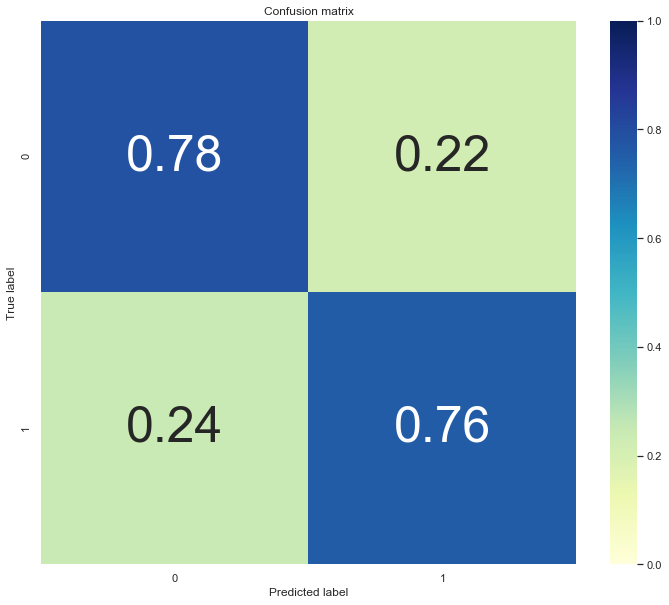


The classification accuracy of C parameter 233.57214690901213 is: 0.755
The Logarithmic loss of C parameter 233.57214690901213 is: 0.49414558401089387


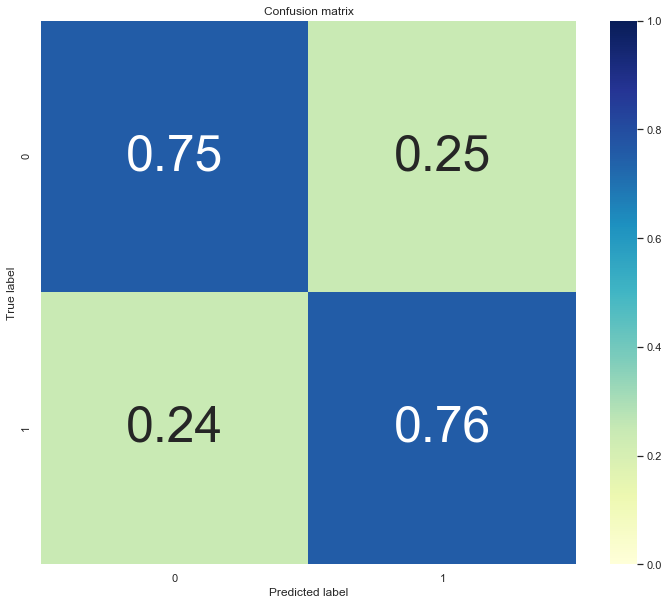

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)



The classification accuracy of C parameter 784.7599703514607 is: 0.775
The Logarithmic loss of C parameter 784.7599703514607 is: 0.487472355786839


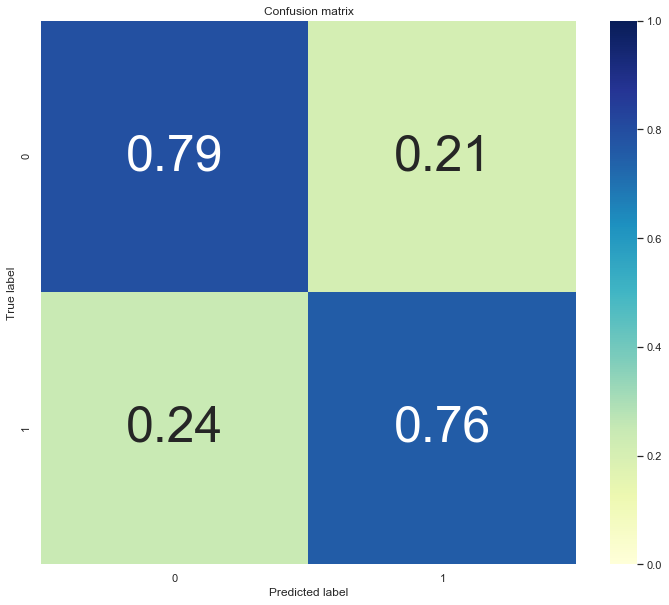


The classification accuracy of C parameter 2636.6508987303555 is: 0.77
The Logarithmic loss of C parameter 2636.6508987303555 is: 0.493192467520479


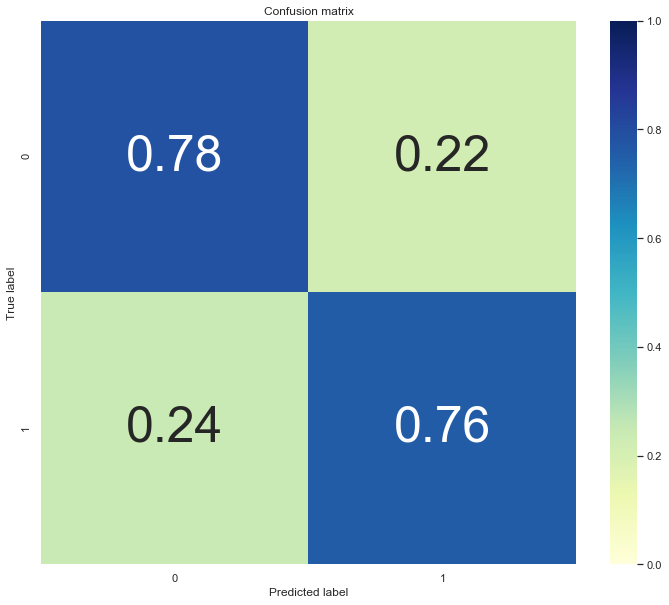

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)



The classification accuracy of C parameter 8858.667904100832 is: 0.77
The Logarithmic loss of C parameter 8858.667904100832 is: 0.4932270822908674


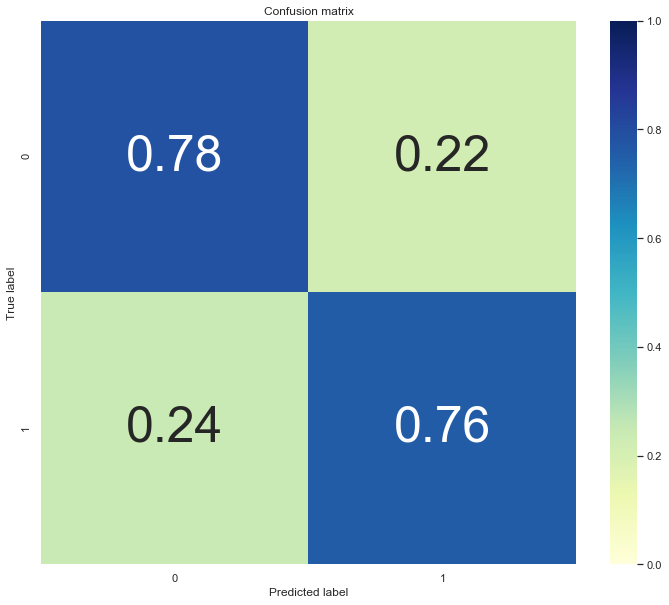


The classification accuracy of C parameter 29763.51441631313 is: 0.77
The Logarithmic loss of C parameter 29763.51441631313 is: 0.49320162808172013


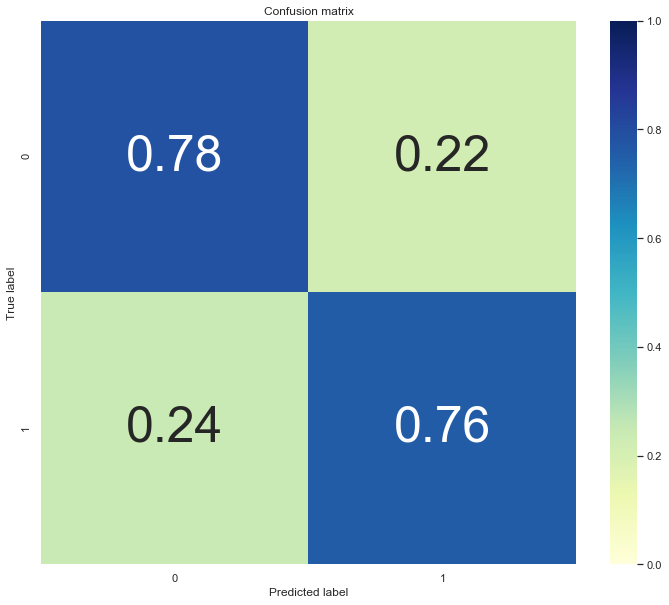

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)



The classification accuracy of C parameter 100000.0 is: 0.76
The Logarithmic loss of C parameter 100000.0 is: 0.49176627323953603


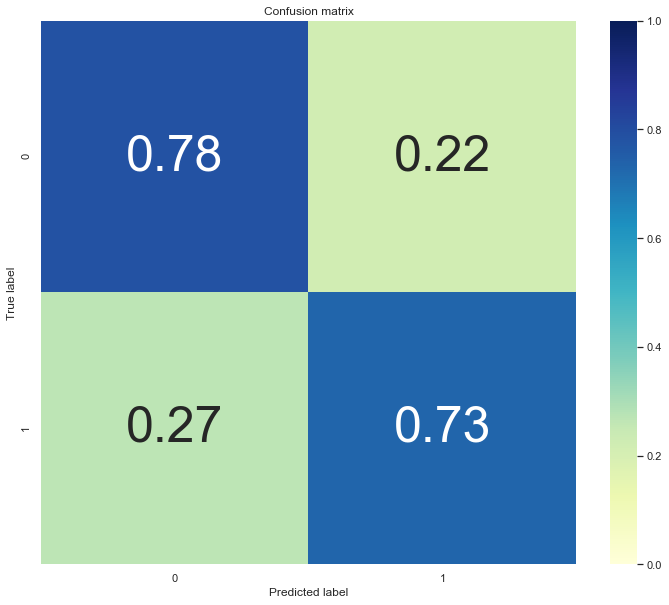

In [619]:
# if we want to track different matrix

# looping over the parameter
c_list = np.geomspace(1e-5, 1e5, num=20)
# classification accuracy
CA = []
logarithmic_loss = []

for c in c_list:
    logistic_regression2 = LogisticRegression(random_state = 15, solver = 'lbfgs', C = c)
    logistic_regression2.fit(x_train, y_train)
    score = logistic_regression2.score(x_test, y_test)
    CA.append(score)
    print('\nThe classification accuracy of C parameter {} is: {}'.format(c, score))
    prediction_prob_t = logistic_regression2.predict_proba(x_test)
    log_loss2 = log_loss(y_test, prediction_prob_t)
    logarithmic_loss.append(log_loss2)
    print('The Logarithmic loss of C parameter {} is: {}'.format(c, log_loss2))
    
    y_pred = logistic_regression2.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
    plot_confusion_matrix(cm_norm, classes = logistic_regression.classes_, title='Confusion matrix')
    plt.show()

## Training a Dummy Classifier

In [633]:
# training dummy classifier
from sklearn.dummy import DummyClassifier

dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(x_train, y_train)

score = dummy_classifier.score(x_test, y_test)
dummy_log_loss = log_loss(y_test, pred_proba_t)

print("Testing Acc:", score)
print("Log Loss:", dummy_log_loss)
# Doc: https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html

Testing Acc: 0.53
Log Loss: 0.49225011724365453


# 7. Final Model with Selected Parameters

In [655]:
# final model with best parameters

final_logistic = LogisticRegression(random_state=15, solver='lbfgs', C = 784.759970)
final_logistic.fit(x_test, y_test)


final_y_predict = final_logistic.predict(x_valid)

final_score = final_logistic.score(x_valid, y_valid)
final_predicate_prob =  final_logistic.predict_proba(x_valid)
final_log_loss = log_loss(y_valid, final_predicate_prob)

print("Testing Acc:", final_score)
print("Log Loss:", final_log_loss)

Testing Acc: 0.75
Log Loss: 0.5666728738993745


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [44]:
cc = loan_df.copy(deep=True)

In [53]:
cc.columns = map(str.lower, cc.columns)

In [46]:
cc.head()

,type of account,account history,reason for the loan,loan amount,account savings,employment history,individual stauts,other loans,security / collateral,age,residence status,job,completed other loan?,good loan
0,No Data,critical,Learning / Edu purposes,2116.0,0-200,5-7 Years,Male,No,Property - Real Estate,47.0,House Owner,Services,No,No
1,No Data,critical,TV,2438.0,No Data,7+ Years,Male,No,Savings Account,52.0,House Owner,Skilled Labor,No,No
2,No Data,critical,Buying a New Car,2144.0,0-200,2-5 Years,Male,No,Vehicle,48.0,House Owner,Skilled Labor,No,No
3,No Data,critical,Home furniture,2073.0,No Data,2-5 Years,Married,No,Vehicle,25.0,House Owner,Skilled Labor,Yes,No
4,No Data,critical,Support for Business,1276.0,No Data,7+ Years,Male,No,No Security,59.0,Renting,Services,No,No
